In [32]:
# Install the igraph library
install.packages("tcltk")
library(igraph)

Warning message:
“package ‘tcltk’ is not available (for R version 3.3.2)”Warning message:
“package ‘tcltk’ is a base package, and should not be updated”

In [2]:

# Helper function for getting warcbase data into igraph
processFile = function(filepath) {
  con = file(filepath, "r")
  line = readLines(con)
  line <- as.data.frame(do.call(rbind, (strsplit(gsub('\\(|\\)', '', line), ','))), stringsAsFactors=FALSE)
  names(line) = c("date", "from", "to", "weight")
  return (line)
  close(con)
}


In [3]:

# Grab the data files
filepath = '~/data/links/'
file = 'ALBERTA_energy_environment'
suffix = '-links.txt'

savesuffix = '.graphml'
savepath = '~/data/graphml/'

filename = paste0(filepath, file, suffix)
savename = paste0(savepath, file, savesuffix)

graph_file <- graph.data.frame(unique(processFile(filename)[c("from", "to")]), directed=TRUE)
graph_file <- simplify(graph_file)

print(graph_file)
print(V(graph_file)$name)

Warning message:
“closing unused connection 4 (~/data/links/ALBERTA_energy_environment-links.txt)”

IGRAPH DN-- 414 411 -- 
+ attr: name (v/c)
+ edges (vertex names):
 [1] cepa.com->capp.ca              cepa.com->plainsmidstream.com 
 [3] cepa.com->youtube.com          cepa.com->ducks.ca            
 [5] cepa.com->enform.ca            cepa.com->nrcan.gc.ca         
 [7] cepa.com->shop.csa.ca          cepa.com->wcss.ab.ca          
 [9] cepa.com->albertaonecall.com   cepa.com->canadiancga.com     
[11] cepa.com->accesspipeline.com   cepa.com->schulich.ucalgary.ca
[13] cepa.com->statcan.gc.ca        cepa.com->issuu.com           
[15] cepa.com->fortisbc.com         cepa.com->neb-one.gc.ca       
+ ... omitted several edges
  [1] "cepa.com"                             
  [2] "ceaa-acee.gc.ca"                      
  [3] "capp.ca"                              
  [4] "plainsmidstream.com"                  
  [5] "energy.ca"                            
  [6] "pm.gc.ca"                             
  [7] "greenpeace.org"                       
  [8] "youtube.com"                          
 

In [4]:
# Write the graphml
write.graph (graph_file, savename, format='graphml')

In [17]:

#Create vectors for strongly connected components, degree etc.
V(graph_file)$s_component <- clusters(graph_file, "strong")$membership
V(graph_file)$w_component <- clusters(graph_file, "weak")$membership
V(graph_file)$indegree <- degree(graph_file, mode="in", loops=FALSE)
V(graph_file)$outdegree <- degree(graph_file, mode="out", loops=FALSE)
V(graph_file)$degree <- degree(graph_file, loops=FALSE)

#print(V(graph_file)$name)
 
dist_component_id <- which(clusters(graph_file, "strong")$csize == max(clusters(graph_file, "strong")$csize))
weak_component_id <- which(clusters(graph_file, "weak")$csize == max(clusters(graph_file, "weak")$csize))

strongly_connected_graph <- induced_subgraph(graph_file, which(V(graph_file)$s_component == dist_component_id))
weakly_connected_graph <- induced_subgraph(graph_file, which(V(graph_file)$w_component == weak_component_id))

#  It may not make sense to plot the full graph if it is too large.
#  In this case, we should plot a large component.  In extreme cases,
#  We can plot just the strongly connected component.

full <- graph_file
weak <- weakly_connected_graph
strong <- strongly_connected_graph

#  Change graph_plot_name to whichever of the above you'd like to plot.

graph_plot_name <- full
V(graph_plot_name)$indegree <- degree(graph_plot_name, mode="in", loops=FALSE)
V(graph_plot_name)$outdegree <- degree(graph_plot_name, mode="out", loops=FALSE)
V(graph_plot_name)$degree <- degree(graph_plot_name, loops=FALSE)
avg_indegree <- mean(V(graph_plot_name)$indegree)
avg_outdegree <- mean(V(graph_plot_name)$outdegree)
avg_degree <- mean(V(graph_plot_name)$degree)

V(graph_plot_name)$relevant <- V(graph_plot_name)$degree > avg_degree + 5
V(graph_plot_name)$rlabel[which(V(graph_plot_name)$relevant == TRUE)] <- V(graph_plot_name)$name[which(V(graph_plot_name)$relevant == TRUE)]
V(graph_plot_name)$wtc <- membership(cluster_edge_betweenness(graph_plot_name))


Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

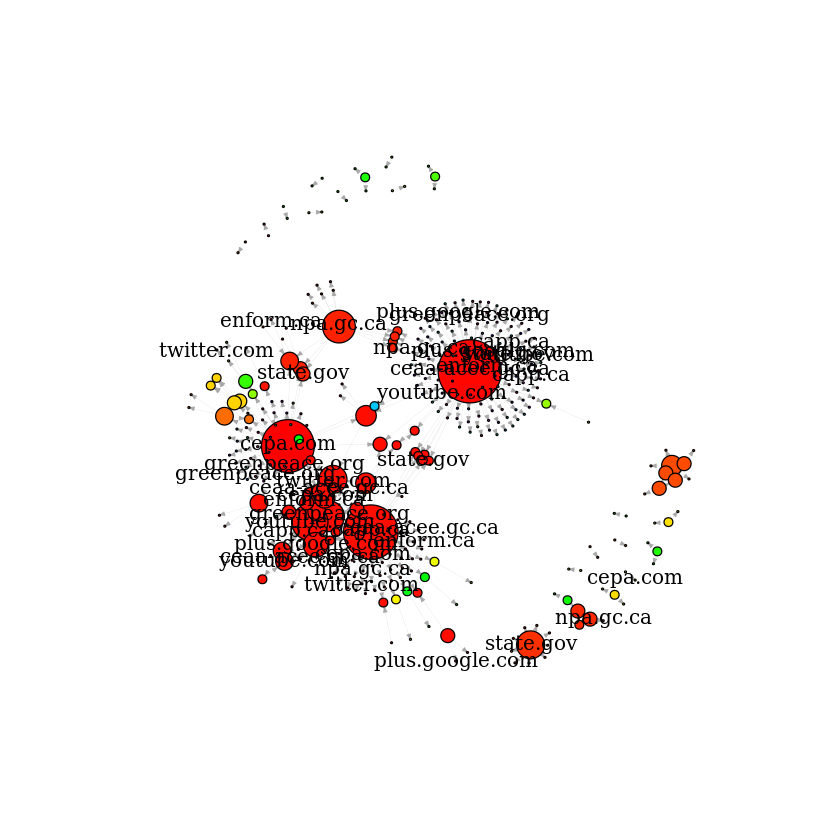

In [34]:
mems <- V(graph_plot_name)$wtc
colors <- rainbow(max(mems))

# R plots have a variety of layouts that you can choose from.
# cut and paste any of these into the "layout =" section to change the layout.
# "layout_nicely" is a good generic layout in most cases.

#  layout_nicely(graph_plot_name)
#  layout_with_sugiyama(graph_plot_name)
#  layout_as_tree(graph_plot_name)
#  layout_in_circle(graph_plot_name)
#  layout_on_grid(graph_plot_name)
#  layout_on_sphere(graph_plot_name)
#  layout_with_lgl(graph_plot_name)
#  layout_with_fr(graph_plot_name)

layout = layout_with_fr(graph_plot_name)


plot(graph_plot_name, 
     layout=layout, 
     vertex.size=log(V(graph_plot_name)$degree)*5, 
     vertex.label=V(graph_plot_name)$rlabel, 
     vertex.color=colors[mems],
     vertex.frame.color = "black",
     vertex.label.color="black", 
     vertex.label.font="",
     vertex.label.cex=1,
     vertex.label.dist=0,
     label.degree=-pi/4,
     vertex.shape = "circle", # can be “circle”, “square”, “csquare”, 
       #“rectangle”, “crectangle”, “vrectangle”, “pie”, ‘sphere’, and “none”
     edge.width=0.1, 
     edge.arrow.size=0.2, 
     edge.arrow.width=1,
     edge.lty=1,  #0 and “blank” mean no edges, 
     #1 and “solid” are for solid lines, the other possible values are: 
     #2 (“dashed”), 3 (“dotted”), 4 (“dotdash”), 5 (“longdash”), 6 (“twodash”)
    )